<a href="https://colab.research.google.com/github/thunderdog101/database/blob/main/Copy_of_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing packages
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import plotly.offline as py
import statsmodels.api as sm
import plotly.graph_objs as go
import seaborn as sns
import altair as alt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
from google.colab import drive
drive.mount('/gdrive') 

Mounted at /gdrive


In [3]:
df = pd.read_csv('/gdrive/MyDrive/Speed_Dating_Data.csv', encoding="ISO-8859-1")
# df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/Speed Dating Data.csv', encoding="ISO-8859-1")      # from scu google drive
df.head() 

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
mapping = {1: 'black', 2: 'white', 3: 'latino', 4:'asian', 5:'native_american', 6:'other'}  
mapping1 = {0: 'female', 1: 'male'}                     
df = df.replace({'race_o': mapping, 'race_o': mapping})                                                      # change numeric values for race to race type for one's 'partner'
df = df.replace({'race': mapping, 'race': mapping})
df = df.replace({'gender': mapping1, 'gender': mapping1})                                                    # change [0 1] to string [female male]
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,female,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,white,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,asian,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,female,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,white,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,asian,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,female,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,asian,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,asian,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,female,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,white,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,asian,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,female,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,latino,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,asian,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,male,44,2,21,22,14,10.0,5,18,526.0,0,0.64,0,26.0,latino,10.0,10.0,30.0,20.0,10.0,15.0,1,10.0,5.0,3.0,2.0,6.0,5.0,6.0,1.0,NaN,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,white,...,7.0,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,80.0,0.0,10.0,0.0,0.0,10.0,50.0,5.0,10.0,20.0,10.0,5.0,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,male,44,2,21,22,13,10.0,4,19,527.0,0,0.71,0,24.0,other,50.0,20.0,10.0,5.0,10.0,5.0,0,6.0,3.0,7.0,3.0,7.0,2.0,2.0,2.0,2.0,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,white,...,7.0,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,80.0,0.0,10.0,0.0,0.0,10.0,50.0,5.0,10.0,20.0,10.0,5.0,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,male,44,2,21,22,19,10.0,10,20,528.0,0,-0.46,0,29.0,latino,40.0,10.0,30.0,10.0,10.0,NaN,0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,white,...,7.0,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,80.0,0.0,10.0,0.0,0.0,10.0,50.0,5.0,10.0,20.0,10.0,5.0,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,male,44,2,21,22,3,10.0,16,21,529.0,0,0.62,0,22.0,asian,10.0,25.0,25.0,10.0,10.0,20.0,1,5.0,7.0,5.0,5.0,3.0,6.0,6.0,4.0,2.0,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,white,...,7.0,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0

In [ ]:
df['fun_o'].value_counts(normalize=True)
df.count()

In [ ]:
df_unique = df.drop_duplicates(subset = ["iid"])  # subset for each individual person
df_unique.head()
# df_unique.to_csv('df_unique.csv')

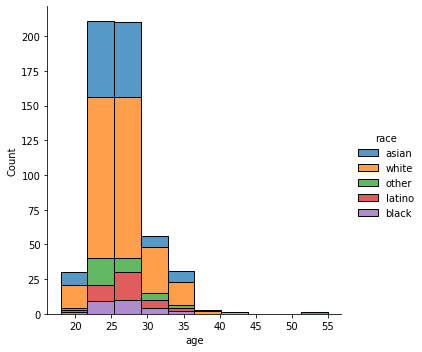

In [8]:
color = sns.color_palette("BrBG")
# sns.histplot(data=df_unique, x="age", binwidth=6, hue = 'race_o', color=sns.color_palette())
# ax = sns.countplot(x="age", data=df_unique)
sns.displot(df_unique, x="age", hue='race', bins=10, multiple='stack')

In [ ]:
# sns.pairplot(df_unique)

In [17]:
test = (df_unique[['iid', 'pid']])
# test.to_csv('file1.csv') 

In [18]:
df_unique[['attr_o', 'attr3_1', 'sinc_o', 'sinc3_1']].describe()


,attr_o,attr3_1,sinc_o,sinc3_1
count,543.000000,542.000000,529.000000,542.000000
mean,6.288214,7.092251,7.544423,8.285978
std,2.248470,1.390081,1.951692,1.412038
min,0.000000,2.000000,0.000000,2.000000
25%,5.000000,6.000000,6.000000,8.000000
50%,6.000000,7.000000,8.000000,8.000000
75%,8.000000,8.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000


In [19]:
attributes_gender = df_unique[['gender','attr3_1', 'attr_o','sinc3_1','sinc_o','intel3_1','intel_o','fun3_1','fun_o']].groupby('gender').mean()
cols = ['attractive_self_score', 'attractive_partner_score','sincere_self_score','sincere_partner_score','intelligent_self_score','intelligent_partner_score','fun_self_score','fun_partner_score']
attributes_gender.columns= cols

In [ ]:
trace1 = go.Bar(
    y=list(attributes_gender.iloc[1]),
    x=attributes_gender.columns.values,
    name='men',
    marker=dict(
        color='cornflowerblue'
    )
)

trace2 = go.Bar(
    y=list(attributes_gender.iloc[0]),
    x=attributes_gender.columns.values,
    name='Women',
    marker=dict(
        color='lightpink'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title='Men/Women self-assessment vs how others score them (scale 1:10)',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='barchart')


In [ ]:
df2 = sns.load_dataset('iris')
df2.head()

# sns.boxplot( x=df2["species"], y=df2["sepal_length"] );
# plt.show()

In [ ]:
sns.boxplot( x=df2["species"], y=df2["sepal_length"] );
plt.show()

In [ ]:
atributes_gender.head()

Text(0.5, 1.0, 'Influence of attractiveness for match  (1-10 scale)')

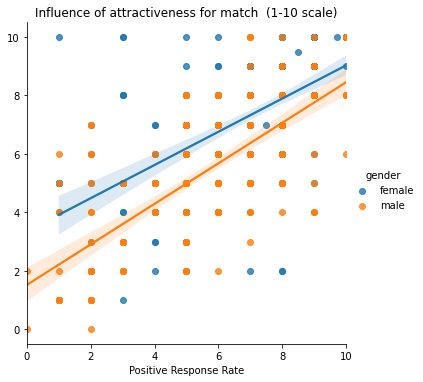

In [25]:
fig = sns.lmplot(x="like_o",
            y="attr_o", 
            hue='gender',
            data=df_unique)
fig.set_axis_labels('Positive Response Rate', '')
plt.title('Influence of attractiveness for match  (1-10 scale)')

Text(0.5, 1.0, 'Influence of sincerity for match')

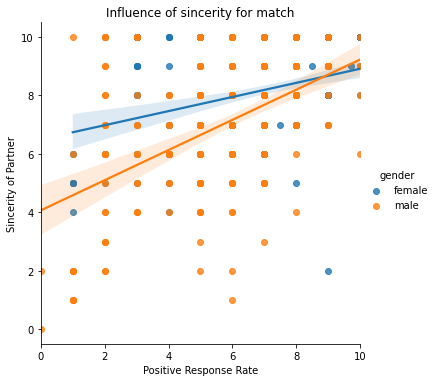

In [26]:
fig = sns.lmplot(x="like_o",
            y="sinc_o", 
            hue='gender',
            data=df_unique)
fig.set_axis_labels('Positive Response Rate', 'Sincerity of Partner')
plt.title('Influence of sincerity for match')

Text(0.5, 1.0, 'Influence of intelligence for match')

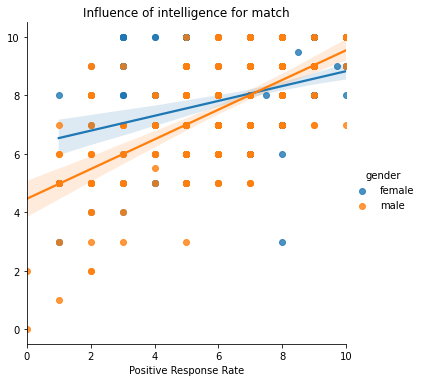

In [27]:
fig = sns.lmplot(x="like_o",
            y="intel_o", 
            hue='gender',
            data=df_unique)
fig.set_axis_labels('Positive Response Rate', '')
plt.title('Influence of intelligence for match')

Text(0.5, 1.0, 'Influence of fun for match')

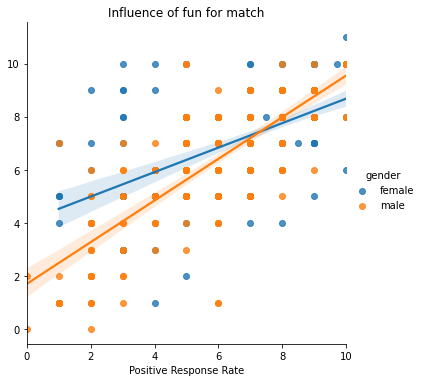

In [28]:
fig = sns.lmplot(x="like_o",
            y="fun_o", 
            hue='gender',
            data=df_unique)
fig.set_axis_labels('Positive Response Rate', '')
plt.title('Influence of fun for match')